importing the dependies  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data preprossing

In [2]:
df=pd.read_csv('/content/gold_monthly_csv.csv')

In [3]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
X=df['Date']
Y=df['Price']

In [6]:
X

,Date
0,1950-01
1,1950-02
2,1950-03
3,1950-04
4,1950-05
...,...
842,2020-03
843,2020-04
844,2020-05
845,2020-06


In [8]:
Y

,Price
0,34.730
1,34.730
2,34.730
3,34.730
4,34.730
...,...
842,1593.764
843,1680.030
844,1715.697
845,1734.032


In [9]:
# create the dummy varible
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=le.fit_transform(X)

In [10]:
# spliting the dataset indo training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
#Feature scaleing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train.reshape(-1, 1))
X_test=sc.fit_transform(X_test.reshape(-1, 1))

In [13]:
# imporitng the keras libraries and packeges
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [15]:
# intialising the ANN
classifier=Sequential()

# adding the input layers and frist hidden layers
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=1))

# adding the second hidden layers
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

# adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

# compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Fitting the Ann to the training set
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)
#list all data in history
print(model_history.history.keys())

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0000e+00 - loss: 28.9326 - val_accuracy: 0.0000e+00 - val_loss: -25.4709
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -55.0959 - val_accuracy: 0.0000e+00 - val_loss: -110.5953
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -147.1857 - val_accuracy: 0.0000e+00 - val_loss: -204.2054
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -268.9756 - val_accuracy: 0.0000e+00 - val_loss: -321.8770
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -403.1431 - val_accuracy: 0.0000e+00 - val_loss: -468.7054
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -521.2381 - val_accuracy: 0.0000e+00 - val_loss: -648.1981
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -819.6290 - val_accuracy: 0.0000e+00 - val_loss: -882.4611
Epoch 8/100
46/46

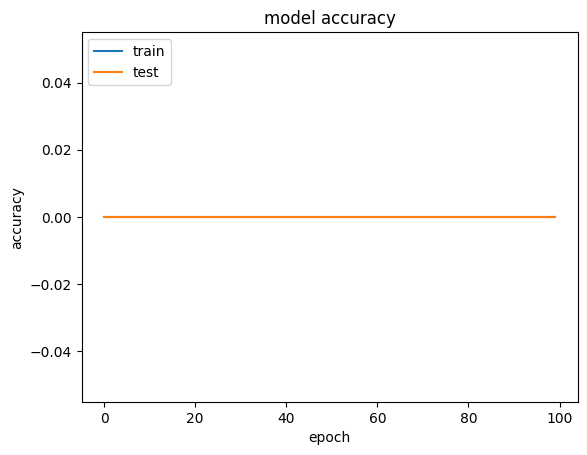

In [17]:
# summarize history for accuarcy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

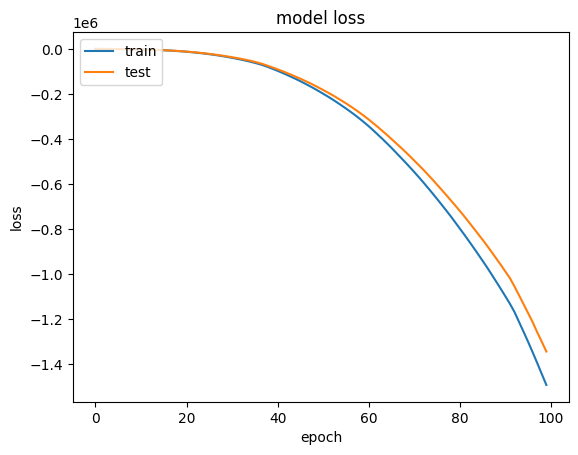

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [19]:
# making the predictions and evaluating model
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [21]:
# making the predictions and evaluating model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(Y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Squared Error: 356525.92804611183
R-squared score: -0.8219492842911051


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 414613.7188 - mean_squared_error: 414613.7188 - val_loss: 343163.4688 - val_mean_squared_error: 343163.4688
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 415379.9688 - mean_squared_error: 415379.9688 - val_loss: 342891.5000 - val_mean_squared_error: 342891.5000
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 373769.8750 - mean_squared_error: 373769.8750 - val_loss: 342569.4062 - val_mean_squared_error: 342569.4062
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 380882.7188 - mean_squared_error: 380882.7188 - val_loss: 341885.2500 - val_mean_squared_error: 341885.2500
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 417239.3438 - mean_squared_error: 417239.3438 - val_loss: 340864.8125 - val_mean_squared_error: 340864.8125
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 417421.2500 - mean_squared_error: 417421.2500 - val_loss: 339812.9688 - val_mean_squared_error: 339812.968

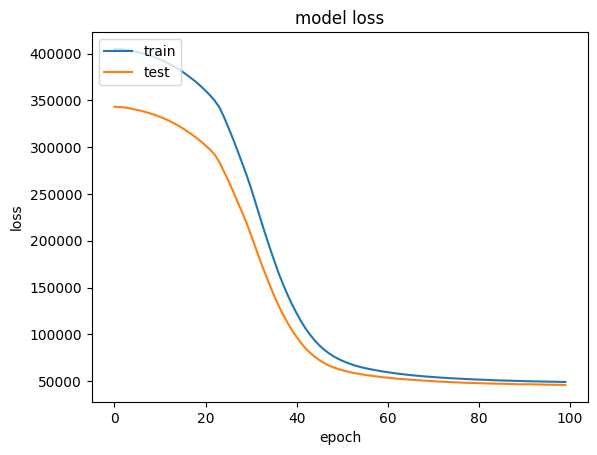

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error: 55643.132882493956
R-squared score: 0.7156477042593583


In [33]:
# prompt: cerate a predtive model

import matplotlib.pyplot as plt
# Since this is a regression task, the activation function for the output layer should be linear.
# Also, the loss function should be appropriate for regression, like 'mean_squared_error'.
# The metrics should also be suitable for regression, like 'mean_squared_error'.

# intialising the ANN
classifier = Sequential()

# adding the input layers and frist hidden layers
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=1))

# adding the second hidden layers
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# adding the output layer - Changed activation to 'linear' for regression
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='linear'))

# compiling the ANN - Changed loss and metrics for regression
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
classifier.summary()

# Fitting the Ann to the training set
model_history = classifier.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=100)

# list all data in history
print(model_history.history.keys())

# summarize history for loss (accuracy is not relevant for regression)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# making the predictions and evaluating model
y_pred = classifier.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(Y_test, y_pred)
print(f"R-squared score: {r2}")
